Creating a Forward Prop network

https://github.com/lazyprogrammer/machine_learning_examples/blob/master/ann_class/forwardprop.py

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Create 500 samples per class

Nclass = 500

Generate some gausian clouds

Use Randn to return a sample (or samples) from the “standard normal” distribution.

The "+ np.array([0,-2])" takes each element and centers it around each respective element. For example the first column in X1
is centered around "0" and the second column is centered around "-2"

In [3]:
#Generate some gausian clouds

X1 = np.random.randn(Nclass, 2) + np.array([0, -2])
X2 = np.random.randn(Nclass, 2) + np.array([2, 2])
X3 = np.random.randn(Nclass, 2) + np.array([-2, 2])

X = np.vstack([X1, X2, X3])

In [4]:
#Create some labels

Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)


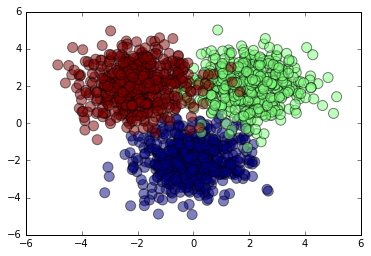

In [5]:
#Visualize Data

plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.5)
plt.show()

In [6]:
#Randomly initialize some weights

D = 2 #Dimensionality of input (# of features)
M = 3 #Hidden layer size
K = 3 #Number of classes (outputs)

W1 = np.random.rand(D,M)
b1 = np.random.rand(M)
W2 = np.random.rand(M,K)
b2 = np.random.rand(K) 

In [24]:
#Define the forward action (2:40)

def forward(X, W1, b1, W2, b2):
    Z = 1 / (1 + np.exp(-(X.dot(W1)+b1))) # Z = value at hidden layer
    
    #Now for softmax for next layer
    A = Z.dot(W2) + b2
    expA = np.exp(A)
    Y = expA / expA.sum(axis = 1, keepdims=True)
    return Y
    


In [8]:
#Define a function to calculate the classification rate

def classification_rate(Y, P): #Takes in Targets "Y" and Predictions "P"
    n_correct = 0 #just to initialize
    n_total = 0
    for i in xrange(len(Y)):
        n_total += 1
        if Y[i] == P[i]:
            n_correct += 1
    return float(n_correct)/ n_total        


Argmax = maximum of argument. In axis 1 we are looking at each row. 

In [9]:
P_Y_given_X = forward(X, W1, b1, W2, b2)
P = np.argmax(P_Y_given_X, axis = 1) #Predictions

With Assert you're telling the program to test that condition, and trigger an error if the condition is false.

In [10]:
assert(len(P)==len(Y))

In [11]:
print "Classification rate for randomly chosen weights:", classification_rate(Y, P)

Classification rate for randomly chosen weights: 0.333333333333


Returns exactly as expected. The correct classification is 33%

In [26]:
Y.shape

(1500L,)

In [25]:
A.shape

NameError: name 'A' is not defined

In [12]:
P.shape

(1500L,)

In [13]:
P_Y_given_X

array([[ 0.29700433,  0.46224174,  0.24075393],
       [ 0.29317691,  0.47263702,  0.23418607],
       [ 0.3019607 ,  0.44343923,  0.25460007],
       ..., 
       [ 0.30070131,  0.44477883,  0.25451986],
       [ 0.31912315,  0.38939274,  0.29148411],
       [ 0.31757987,  0.39524762,  0.28717251]])

In [14]:
Y.shape

(1500L,)

In [15]:
np.array([0,-2])

array([ 0, -2])

In [16]:
X1

array([[  1.42807346e-01,  -3.10433814e+00],
       [ -1.48216615e-01,  -4.36613301e+00],
       [ -1.37353740e+00,  -6.97170490e-01],
       [ -1.03559373e+00,  -2.25415974e+00],
       [  7.59315774e-02,  -3.34430580e+00],
       [ -2.29098701e-01,  -1.79477387e+00],
       [  4.05372283e-01,  -1.08720384e-01],
       [  8.27417022e-01,  -1.45716028e+00],
       [ -7.76249028e-01,  -4.63179385e-01],
       [  2.15172999e+00,  -1.14201766e+00],
       [ -1.13128418e+00,  -4.73839542e-01],
       [ -7.27233061e-01,  -1.19313879e+00],
       [ -3.66640699e-01,  -3.31628501e+00],
       [ -6.80211533e-02,  -3.25412291e+00],
       [ -8.04977287e-01,  -3.69177179e+00],
       [  5.41435285e-01,  -2.19694364e+00],
       [  9.13423797e-01,  -2.17542582e+00],
       [ -1.20885630e+00,  -3.52857399e+00],
       [  9.52109967e-02,  -1.14176967e+00],
       [  2.57344787e-02,  -1.92978800e+00],
       [ -2.22211274e-01,  -1.99723933e+00],
       [ -5.25498579e-01,  -3.28501252e+00],
       [  

In [17]:
X1

array([[  1.42807346e-01,  -3.10433814e+00],
       [ -1.48216615e-01,  -4.36613301e+00],
       [ -1.37353740e+00,  -6.97170490e-01],
       [ -1.03559373e+00,  -2.25415974e+00],
       [  7.59315774e-02,  -3.34430580e+00],
       [ -2.29098701e-01,  -1.79477387e+00],
       [  4.05372283e-01,  -1.08720384e-01],
       [  8.27417022e-01,  -1.45716028e+00],
       [ -7.76249028e-01,  -4.63179385e-01],
       [  2.15172999e+00,  -1.14201766e+00],
       [ -1.13128418e+00,  -4.73839542e-01],
       [ -7.27233061e-01,  -1.19313879e+00],
       [ -3.66640699e-01,  -3.31628501e+00],
       [ -6.80211533e-02,  -3.25412291e+00],
       [ -8.04977287e-01,  -3.69177179e+00],
       [  5.41435285e-01,  -2.19694364e+00],
       [  9.13423797e-01,  -2.17542582e+00],
       [ -1.20885630e+00,  -3.52857399e+00],
       [  9.52109967e-02,  -1.14176967e+00],
       [  2.57344787e-02,  -1.92978800e+00],
       [ -2.22211274e-01,  -1.99723933e+00],
       [ -5.25498579e-01,  -3.28501252e+00],
       [  

In [18]:
X

array([[ 0.14280735, -3.10433814],
       [-0.14821661, -4.36613301],
       [-1.3735374 , -0.69717049],
       ..., 
       [-2.38820833, -0.23047974],
       [-1.65640914,  3.55880846],
       [-0.80078206,  2.1034808 ]])

In [19]:
-X.dot(W1)-b1

array([[ 1.46270485,  1.51054554,  1.73148485],
       [ 2.49680792,  2.5115143 ,  2.6883475 ],
       [ 1.2179756 ,  1.14391632,  0.27222797],
       ..., 
       [ 1.77172168,  1.60962876,  0.11670839],
       [-1.21518705, -1.29047904, -2.73170818],
       [-1.01623754, -1.02329332, -1.83866419]])

In [20]:
P

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)